## Seaborn
- Used for data visualization & analysis.
- Unlike Matplotlib which is more specifically used plotting. 

### DISTRIBUTION Plots to visualize distribution of dataset: distplot, jointplot, pairplot, rugplot, kdeplot

In [1]:
import seaborn as sns
#%matplotlib inline

In [2]:
data = sns.load_dataset('tips') # BUILT IN DATASET in seaborn

In [3]:
data.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### distplot: distribution of a univariate set of observations.

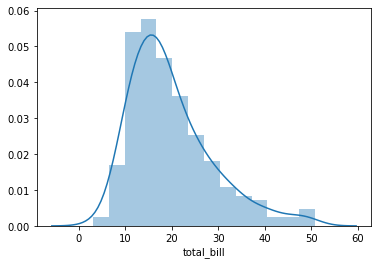

In [4]:
sns.distplot(data['total_bill'])
# the line we see is called the KDE Line. 
# KDE = Kernel Density Estimate - used for visualizing the probability density of a continuous variable.

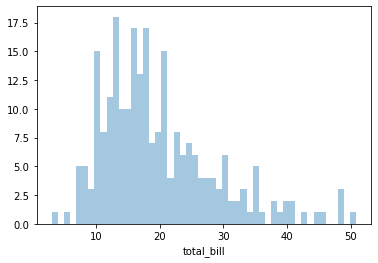

In [5]:
sns.distplot(data['total_bill'],kde=False,bins=50) # to remove kde, put false. Bins are equally spaced intervals.
# X axis plots - total_bill & Y axis would plot the frequency...

### jointplot: It's basically two distplots for bivariate data.
We have a kind parameter that takes values: scatter, reg, kde, hex, resid

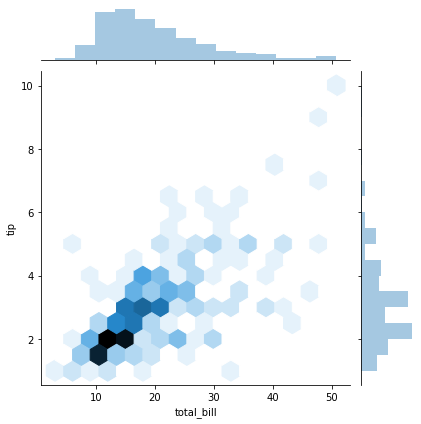

In [6]:
# taking two values
sns.jointplot(x='total_bill',y='tip',data=data,kind='hex') # hence syntax: <x-value, y-value, dataset, kind>

# other kinds: scatter, reg, kde, hex, resid

### pairplot: It will plot pairwise relationships.
Across an entire dataframe (for the numerical columns) & color hue argument (for categorical columns). 

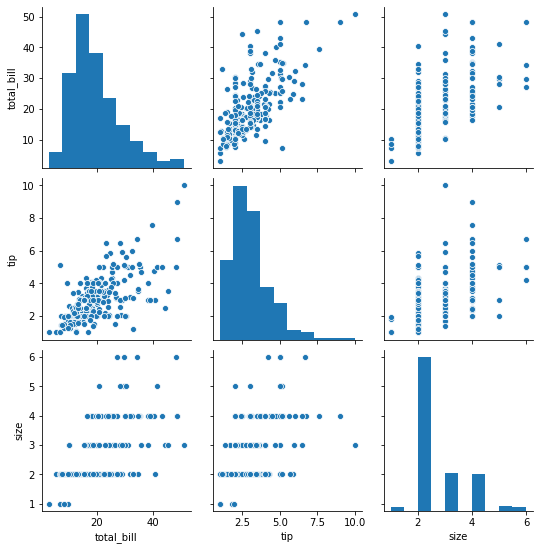

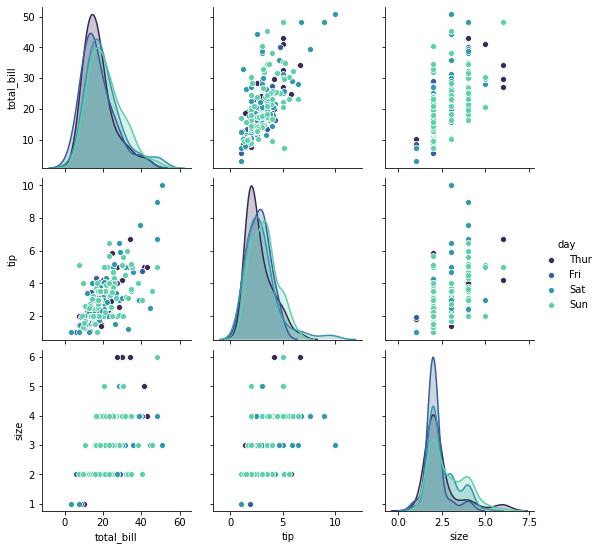

In [7]:
sns.pairplot(data)

##############################

sns.pairplot(data,hue='day',palette='mako') # we have different palette colors: coolwarm, rocket...
# hue is for categorical columns...(like have categoris like day/night..and not a numerical values...in data..)

### rugplot: It draws a dash mark for every point on a univariate distribution. 
- useful for in KDE distribution...

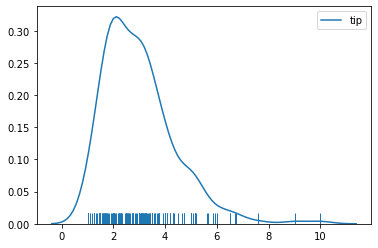

In [8]:
sns.kdeplot(data['tip'])
sns.rugplot(data['tip'])
# both kde plot & rug plot...

In [9]:
##########################################################################################################################
##########################################################################################################################

### CATEGORICAL Plots to visualize: barplot, countplot, factorplot, boxplot, violinplot, stripplot, swarmplot

### barplot 

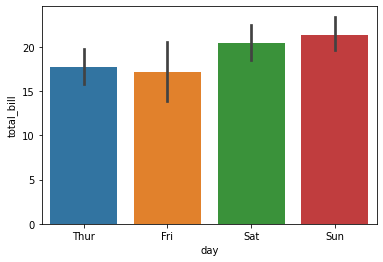

In [10]:
sns.barplot(x='day',y='total_bill',data=data) # we can have an estimator function...

### countplot 
- It's like barplot except the estimator counts no. of occurrences explicitly...

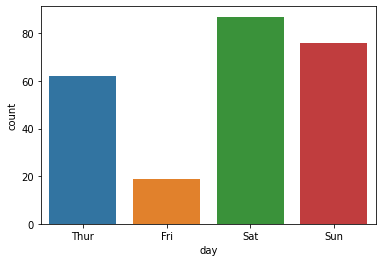

In [11]:
sns.countplot(x='day',data=data)

### factorplot 

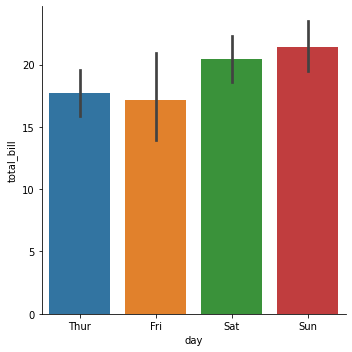

In [12]:
# factorplot is also called catplot 
sns.catplot(x='day',y='total_bill',data=data,kind='bar') # we can have other options in `kind`... 

### boxplot 

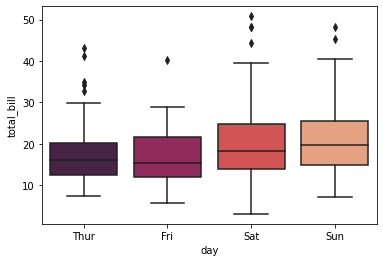

In [13]:
sns.boxplot(x="day", y="total_bill", data=data,palette='rocket')
# boxplots and violinplots are used to shown the distribution of categorical data.

#######################################################################################################################

# WE CAN ADD `hue` PROPERTY AS WELL TO COMPARE IT ALONG WITH X & Y VALUES... 

### violin plot 
- the violin plot features a kernel density estimation of the underlying distribution.

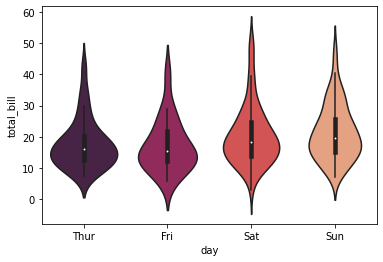

In [14]:
sns.violinplot(x="day", y="total_bill", data=data,palette='rocket')
# WE CAN ADD `hue`, `palette`... 

### stripplot
- It's a scatterplot with one categorial variable & other can be numerical...

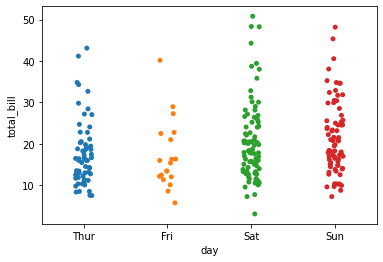

In [15]:
sns.stripplot(x="day", y="total_bill", data=data) 
# WE CAN ADD OPTIONS LIKE: `jitter=True`, `hue`... 

### swarmplot 
- It's like a combo of violin plot + strip plot 

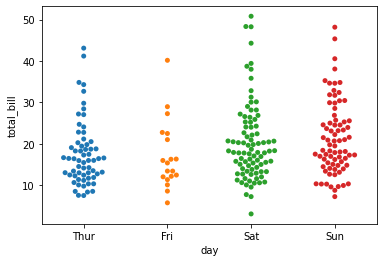

In [16]:
sns.swarmplot(x="day", y="total_bill", data=data)
# can have `split=True`

In [17]:
##########################################################################################################################
##########################################################################################################################

### MATRIX plots: heatmap, pivot table, clustermap


### heatmap
- graphical representation depicted by colour

In [18]:
data.corr()
# it gives us the correlation matrix for the data... summary... 

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


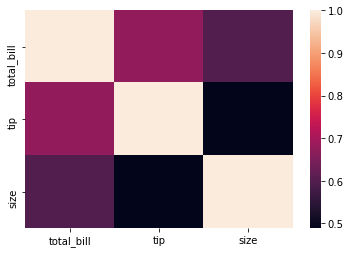

In [19]:
sns.heatmap(data.corr())
# WE CAN ADD A PARAMETER OF `annot=True` to display values in the square cells...,` cmap='rocket' ` for color... 

In [20]:
data.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


### pivottable

size      1          2          3          4      5          6
day                                                           
Thur  10.07  15.156875  19.160000  29.950000  41.19  30.383333
Fri    8.58  16.321875  15.980000  40.170000    NaN        NaN
Sat    5.16  16.837170  25.509444  29.876154  28.15        NaN
Sun     NaN  17.560000  22.184000  26.688333  27.00  48.170000


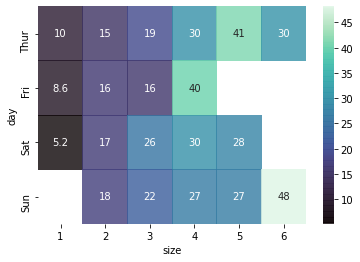

In [21]:
x = data.pivot_table(values='total_bill',index='day',columns='size')
print(x)
sns.heatmap(x,cmap='mako',annot=True, alpha = 0.8) # annot we learned above... alpha is for opacity... 


# we can also add these properties: linecolor='yellow',linewidths=0.5....


### clustermap

In [22]:
# like heatmap. 
# use: `sns.clustermap() function...`

In [23]:
##########################################################################################################################
##########################################################################################################################

### Grids: pairgrids, pairplot, facetgrid, jointgrid

### pairgrid
- subplot grid for plotting pairwise relationships in a dataset.

In [24]:
import matplotlib.pyplot as plt
# seaborn already imported

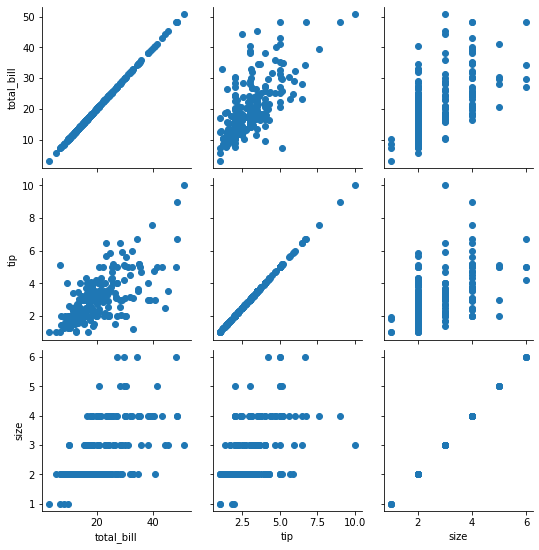

In [25]:
x = sns.PairGrid(data)
x.map(plt.scatter) # scatter plot 

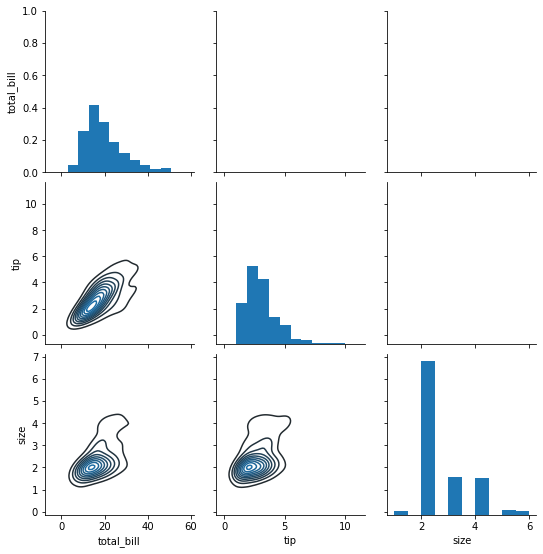

In [26]:
# here we are mapping to upper,lower, & diagonal.
x = sns.PairGrid(data)
x.map_diag(plt.hist)
x.map_lower(sns.kdeplot) # we have map_upper as well... 

### pairplot
- similar to pairgrid.

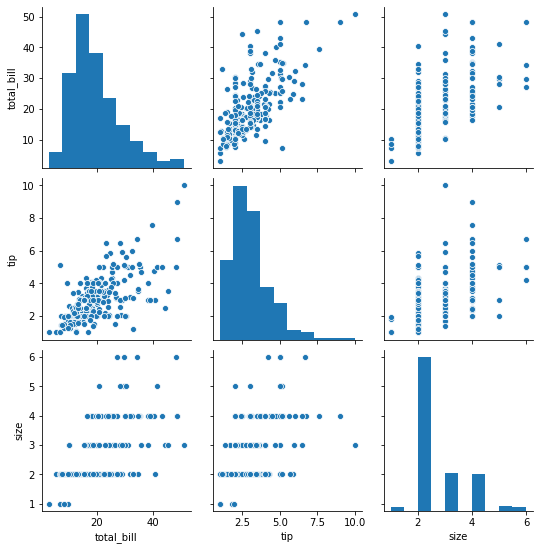

In [27]:
sns.pairplot(data)
# we can have hue and palette...

### facetgrid
- to create grids of plots based on a feature

In [28]:
data.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


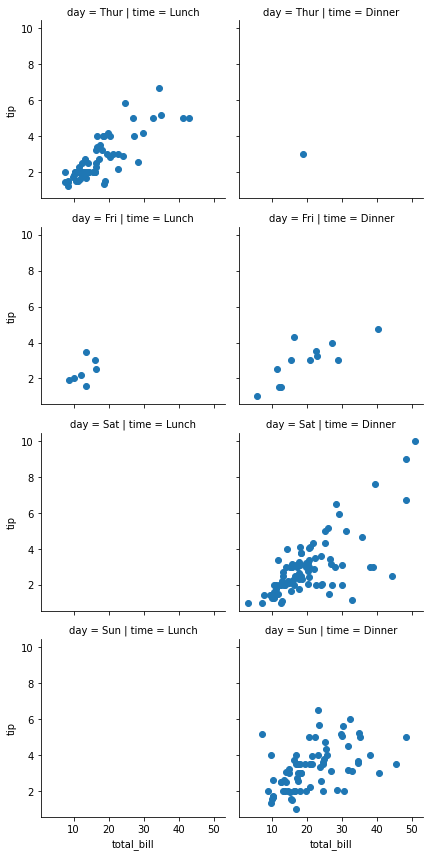

In [29]:
x = sns.FacetGrid(data, col="time", row="day") # we can also have `hue`... 
x = x.map(plt.scatter, "total_bill", "tip").add_legend()

### JointGrid
- It's like jointplot() type grids... 

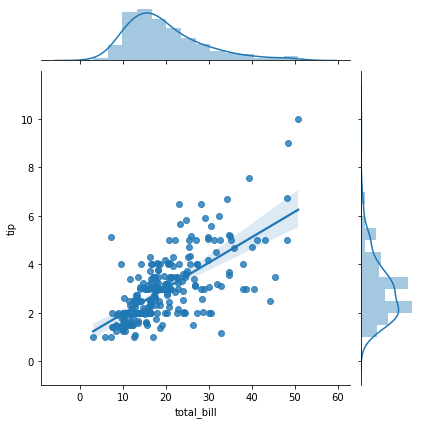

In [30]:
x = sns.JointGrid(x="total_bill", y="tip", data=data) # would give empty canvas...
x = x.plot(sns.regplot, sns.distplot) # takes 2 args. 

In [31]:
#############################################################################################################################
#############################################################################################################################

In [32]:
# we also have `lmplot` which helps display linear models...,we can add colours/hue... 

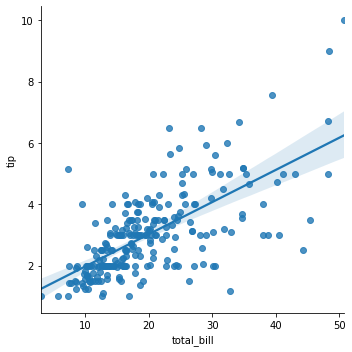

In [33]:
sns.lmplot(x='total_bill',y='tip',data=data)

In [34]:
#############################################################################################################################
#############################################################################################################################